In [1]:
#!pip install autoviml==0.1.671
!pip install autoviml

     |████████████████████████████████| 125 kB 1.2 MB/s 
     |████████████████████████████████| 115 kB 4.3 MB/s 
     |████████████████████████████████| 125 kB 8.0 MB/s 
     |████████████████████████████████| 96 kB 3.2 MB/s 


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from autoviml.Auto_ViML import Auto_ViML
from fastai.tabular import *
import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Imported Auto_ViML version: 0.1.680. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            
Now Auto_ViML can solve multi-label, multi-output problems. Also Auto_NLP included.
To get the latest version, perform "pip install autoviml --no-cache-dir --ignore-installed"


Imported Auto_NLP version: 0.0.45.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)
/kaggle/input/workation-price-prediction-challengemachinehack/sample submission.csv
/kaggle/input/workation-price-prediction-challengemachinehack/Train.csv
/kaggle/input/workation-price-prediction-challengemachinehack/Test.csv


In [3]:
train = pd.read_csv('/kaggle/input/workation-price-prediction-challengemachinehack/Train.csv')
test = pd.read_csv('/kaggle/input/workation-price-prediction-challengemachinehack/Test.csv')
sub = pd.read_csv('/kaggle/input/workation-price-prediction-challengemachinehack/Test.csv')
for i in sub.columns:
    if i != 'Uniq Id':
        del sub[i]
sub['Per Person Price'] = -1
del sub['Uniq Id']
print(train.shape,test.shape)

(21000, 15) (9000, 14)


In [4]:
test['Per Person Price'] = 0
#append test to train for feature creation
full=train.append(test)
full=full.reset_index()
full=full.drop('index',axis=1)
print(full.shape)

(30000, 15)


In [5]:
# various data correction & preprocessing
full['Hotel Details'] = full['Hotel Details'].str.replace(":One",':1.0')
full['Hotel Details'] = full['Hotel Details'].str.replace(":Two",':2.0')
full['Hotel Details'] = full['Hotel Details'].str.replace(":Three",':3.0')
full['Hotel Details'] = full['Hotel Details'].str.replace(":Four",':4.0')
full['Hotel Details'] = full['Hotel Details'].str.replace(":Five",':5.0')
full['Itinerary'] = ' ' + full['Itinerary'].astype(str)
full['Sightseeing Places Covered'] = full['Sightseeing Places Covered'].str.replace(")",'')
full['Sightseeing Places Covered'] = full['Sightseeing Places Covered'].str.replace("(",'')
full.iloc[27211,5] = full.iloc[27211,3]
full['Sightseeing Places Covered'] = full['Sightseeing Places Covered'].str.lower()
full['Hotel Details'] = full['Hotel Details'].str.lower()
full['Itinerary'] = full['Itinerary'].str.lower()
full['Airline'] = full['Airline'].str.lower()

# Feature Encoding

In [6]:
# extract and create features from destination
alldest = []
temp = full['Destination']
for i in temp:
    truc = i.split('|')
    for i in truc:
        # Island 
        alldest.append(i)
dest = list(set(alldest))
clean = ['Singapore Cruise','Kovalam and Poovar']
for i in dest:
    if i not in clean:
        full[i] = False
        full.loc[full['Destination'].str.contains(i), i] = True 
len(dest)

182

In [7]:
sorted(dest)

['Abu Dhabi',
 'Agra',
 'Ahmedabad',
 'Ahmednagar',
 'Ajmer',
 'Alibagh',
 'Allepey',
 'Almora',
 'Alwar',
 'Amritsar',
 'Anuradhapura',
 'Auckland',
 'Aurangabad',
 'Bali',
 'Bandipur',
 'Bangalore',
 'Bangkok',
 'Batam',
 'Bentota',
 'Bharatpur',
 'Bikaner',
 'Bintan Island',
 'Bundi',
 'Cairns',
 'Chail',
 'Chandigarh',
 'Chennai',
 'Cherrapunjee',
 'Chikmangalur',
 'Chintpurni',
 'Chittorgarh',
 'Christchurch',
 'Cochin',
 'Colombo',
 'Coorg',
 'Copenhagen',
 'Corbett',
 'Dalhousie',
 'Daman',
 'Dambulla',
 'Darjeeling',
 'Dharamshala',
 'Dubai',
 'Dwarka',
 'Franz Josef',
 'Galle',
 'Gangtok',
 'Ganpatipule',
 'Genting',
 'Goa',
 'Gokarna',
 'Gold Coast',
 'Gulmarg',
 'Guwahati',
 'Gwalior',
 'Hampi',
 'Haridwar',
 'Hassan',
 'Havelock',
 'Helsinki',
 'Hong Kong',
 'Jaipur',
 'Jaisalmer',
 'Jakarta',
 'Jammu',
 'Jamnagar',
 'Jodhpur',
 'Johor Bahru',
 'Joshimath',
 'Kabini',
 'Kalimpong',
 'Kanchipuram',
 'Kandy',
 'Kangra',
 'Kanyakumari',
 'Kasauli',
 'Kasol',
 'Katra',
 'Kausan

In [8]:
full[full['Singapore']==True]

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Chintpurni,Nasik,Ranikhet,Kaziranga,Kodaikanal,Hassan,Chail,Ajmer,Bentota,Daman,Kullu,Joshimath,Kanchipuram,Penang,Galle,Darjeeling,Kalimpong,Krabi town,Coorg,Pattaya,Aurangabad,Hong Kong,Ahmedabad,Sonmarg,Kausani,Amritsar,Mumbai,Dalhousie,Chennai,Sharjah,Gulmarg,Niel Island,Bintan Island,Melbourne,Ranakpur,...,Shirdi,Khajuraho,Chandigarh,Bangkok,Saint Petersburg,Phuentsholing,Seminyak,Yala,Jammu,Dharamshala,Ras Al Khaimah,Kabini,Jamnagar,Orchha,Jaisalmer,Katra,Nainital,Varanasi,Guwahati,Rishikesh,Phuket,Bharatpur,Franz Josef,Leh,Varkala,Kuta,Kumbakonam,Rotorua,Lucknow,Trivandrum,Alwar,Jaipur,Kovalam,Cherrapunjee,Kasauli,Negombo,Genting,Alibagh,Kumarakom,Colombo,Queenstown,Pali,Jodhpur,Mysore,Saputara,Nubra Valley,Nameri,Mauritius,Gangtok,Kanyakumari
48,5f2c43b92b1368cb55a7d26c20e66fac,Family Holiday in Bali and Singapore - 6 Nights,Standard,Bali|Singapore,3n bali . 3n singapore,Bali|Singapore,05-01-2022,best western kuta beach-mmt special:3.0|quality hotel marlow:,New Delhi,thai airways|thai airways|airasia indonesia|srilankan airlines|srilankan airlines,2,3,guided kintamani tour with indian lunch and private transfers | bali zoo visit with private transfers explorer package,Cancellation any time after making the 1st payment instalment till the 2nd payment date:The entire amount paid as 1st payment instalment (deposit) would be non-refundable.Cancellation after 2nd payment instalment and before 3rd or final payment date:The total amount that was due at the 2nd payment instalment as per your payment schedule would be non-refundable; anything that you have paid over and above this amount would be refundable.Cancellation after 3rd or final payment date:The full amount paid by you would be non-refundable.,"49,045.00",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
230,840d7341b62a9a1df99b4fe968082bf7,Singapore-Weekend Break,Deluxe,Singapore,4n singapore,Singapore,18-01-2022,ramada by wyndham singapore at zhongshan park:4.0,New Delhi,indigo|indigo,1,3,singapore river safari + night safari combo without-guided with shared transfer,Cancellation any time after making the 1st payment instalment till the 2nd payment date:The entire amount paid as 1st payment instalment (deposit) would be non-refundable.Cancellation after 2nd payment instalment and before 3rd or final payment date:The total amount that was due at the 2nd payment instalment as per your payment schedule would be non-refundable; anything that you have paid over and above this amount would be refundable.Cancellation after 3rd or final payment date:The full amount paid by you would be non-refundable.,"27,361.50",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
257,82f8cde5670afd3399553d147b1c1c6e,Stunning Singapore & Magnificent New Zealand,Standard,Singapore|Auckland|Rotorua|Queenstown|Christchurch,2n singapore . 2n auckland . 2n rotorua . 3n queenstown . 2n christc

In [9]:
# extract and create features from destination Hotel Details
full['mmt'] = False
full.loc[full['Hotel Details'].str.contains('mmt'), 'mmt'] = True

full['Hotel Details'] = full['Hotel Details'].str.replace(" - mmt holidays special",'')
full['Hotel Details'] = full['Hotel Details'].str.replace("- mmt holidays special",'')
full['Hotel Details'] = full['Hotel Details'].str.replace("-mmt holidays special",'')
full['Hotel Details'] = full['Hotel Details'].str.replace("(mmt holidays special)",'')
full['Hotel Details'] = full['Hotel Details'].str.replace(" - mmt special",'')
full['Hotel Details'] = full['Hotel Details'].str.replace("- mmt speciall",'')
full['Hotel Details'] = full['Hotel Details'].str.replace("-mmt special",'')
full['Hotel Details'] = full['Hotel Details'].str.replace("mmt special",'')

hotels = []
temp = full['Hotel Details']
for i in tqdm(temp):
    truc = i.split('|')
    for i in truc:
        keep = ''
        if i[-4] == ":":
            keep = i[:-4]
        else:
            if i[-3] == ":":
                keep = i[:-3]
            else:
                if i[-2] == ":":
                    keep = i[:-2]
                else:
                    if i[-1] == ":":
                        keep = i[:-1]
                    
        hotels.append(keep)
hotels = list(set(hotels))
for i in tqdm(hotels):
    full[i] = False
    full.loc[full['Hotel Details'].str.contains(i), i] = True 
len(hotels)

100%|██████████| 1374/1374 [00:31<00:00, 44.00it/s]


1374

In [10]:
# extract and create features from Sightseeing Places Covered
full['mmt2'] = False
full.loc[full['Sightseeing Places Covered'].str.contains('mmt'), 'mmt2'] = True
full['bus'] = False
full.loc[full['Sightseeing Places Covered'].str.contains('bus'), 'bus'] = True

full['Sightseeing Places Covered'] = full['Sightseeing Places Covered'].str.replace("mmt - ",'')
full['Sightseeing Places Covered'] = full['Sightseeing Places Covered'].str.replace(" - mmt ",'')

full['Sightseeing Places Covered'] = full['Sightseeing Places Covered'].str.replace("north",'')
full['Sightseeing Places Covered'] = full['Sightseeing Places Covered'].str.replace("south",'')

exc = []
temp = full['Sightseeing Places Covered']
for i in temp:
    truc = i.split('|')
    for i in truc:
        exc.append(i)
exc = list(set(exc))
for i in tqdm(exc):
    full[i] = False
    full.loc[full['Sightseeing Places Covered'].str.contains(i), i] = True 

len(exc)


100%|██████████| 1128/1128 [00:40<00:00, 28.09it/s]


1128

# Feature Engineering

In [11]:
def sumdigits(str):
    return sum(int(c) for c in str if c.isdigit())

def feature_engineering(df):
    #'Package Type'
    df['Package Type'].replace('Budget', 0,inplace=True)
    df['Package Type'].replace('Standard', 1,inplace=True)
    df['Package Type'].replace('Deluxe', 2,inplace=True)
    df['Package Type'].replace('Luxury', 3,inplace=True)
    df['Package Type'].replace('Premium', 4,inplace=True)
    #'Itinerary'
    duration = []
    for i in range(0,len(df)):
        duration.append(sumdigits(df.iloc[i,4]))
    df['duration'] = duration
    #'Places Covered'
    places = []
    temp = df['Places Covered']
    for i in temp:
        truc = i.split('|')
        places.append(len(truc))
    df['places'] = places
    #'Travel Date'
    #full['Travel Date'] = pd.to_datetime(full['Travel Date'], format='%d-%m-%Y')
    #add_datepart(full,'Travel Date',prefix='day$',drop=False,time=False)
    #df['day'] = df['Travel Date'].str[0:2]
    #df['month'] = df['Travel Date'].str[3:5]
    #df['year'] = df['Travel Date'].str[-4:]
    #'Hotel Details'
    score =[]
    temp = df['Hotel Details']
    for i in tqdm(temp):
        stars = 0.
        if i == 'Not Available':
            score.append(stars)
        else:
            truc = i.split('|')
            tot = 0
            for j in range(0,len(truc)):# 
                if truc[j][-4:-3]==':':
                    stars += float(truc[j][-3:])
                    tot+=1
                else:# 
                    if truc[j][-2:-1]==':':
                        stars += float(truc[j][-1:])
                        tot+=1
            if stars != 0.:
                stars = stars / tot
            score.append(stars)
    df['score'] = score
    df['score'] = df['score'].replace(0., np.nan)
    #'Start City'
    df['Start City'].replace('New Delhi', 0,inplace=True)
    df['Start City'].replace('Mumbai', 1,inplace=True)
    #'Airline'
    airlines = []
    temp = df['Airline']
    for i in temp:
        truc = i.split('|')
        airlines.append(len(truc))
    df['Airnum'] = airlines
    #'Flight Stops'
    #'Meals'
    #'Sightseeing Places Covered'
    visits = []
    temp = df['Sightseeing Places Covered']
    for i in temp:
        truc = i.split('|')
        visits.append(len(truc))
    df['visits'] = visits
    #'Cancellation Rules'
    temp = df['Cancellation Rules'].unique()
    for i in range(0,len(temp)):
        df['Cancellation Rules'].replace(temp[i], i,inplace=True)
    #'Per Person Price'
    
    ##################################################################
    #'Uniq Id'
    del df['Uniq Id']
    #'Package Name'
    del df['Package Name']
    #'Destination'
    del df['Destination']
    #'Itinerary'
    del df['Itinerary']
    #'Places Covered'
    del df['Places Covered']
    #'Travel Date'
    del df['Travel Date'] 
    #'Hotel Details'
    del df['Hotel Details']
    #'Airline'
    #del df['Airline']
    #'Sightseeing Places Covered'
    del df['Sightseeing Places Covered']


In [12]:
feature_engineering(full)

100%|██████████| 30000/30000 [00:00<00:00, 283027.92it/s]


In [13]:
train = full[full['Per Person Price']!=0]
test = full[full['Per Person Price']==0]

In [14]:
train['Per Person Price'] = np.log(train['Per Person Price'])

# Model 1 : Auto ViML

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (21000, 2697)
    Training Set Memory Usage = 55.86 MB
Test Set Shape = (9000, 2697)
    Test Set Memory Usage = 23.94 MB
Single_Label Target: ['Per Person Price']
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 21000 rows, 2696 cols
Too many columns to print
    Numeric Columns: ['score']
    Integer-Categorical Columns: ['Package Type', 'Flight Stops', 'Meals', 'Cancellation Rules', 'duration', 'places', 'Airnum', 'visits']
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boolean Columns: ['Chintpurni', 'Nasik', 'Ranikhet', 'Kaziranga', 'Kodaikanal', 'Hassan', 'Chail', 'Ajmer', 'Bentota', 'Daman', 'Kullu', 'Joshimath', 'Kanchipuram', 'Penan

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.01871
0:	learn: 0.5367230	test: 0.5373078	best: 0.5373078 (0)	total: 64.9ms	remaining: 10m 49s


500:	learn: 0.2232430	test: 0.2296853	best: 0.2296853 (500)	total: 4.77s	remaining: 1m 30s
1000:	learn: 0.1986433	test: 0.2077741	best: 0.2077741 (1000)	total: 9.7s	remaining: 1m 27s
1500:	learn: 0.1857511	test: 0.1969126	best: 0.1969126 (1500)	total: 14.3s	remaining: 1m 20s
2000:	learn: 0.1771138	test: 0.1903993	best: 0.1903993 (2000)	total: 18.8s	remaining: 1m 15s
2500:	learn: 0.1706165	test: 0.1857545	best: 0.1857545 (2500)	total: 23.3s	remaining: 1m 9s
3000:	learn: 0.1654171	test: 0.1822433	best: 0.1822433 (3000)	total: 27.8s	remaining: 1m 4s
3500:	learn: 0.1611230	test: 0.1796338	best: 0.1796338 (3500)	total: 32.4s	remaining: 1m
4000:	learn: 0.1573834	test: 0.1774450	best: 0.1774449 (3999)	total: 37s	remaining: 55.5s
4500:	learn: 0.1541978	test: 0.1756946	best: 0.1756946 (4500)	total: 41.8s	remaining: 51.1s
5000:	learn: 0.1512642	test: 0.1740647	best: 0.1740641 (4999)	total: 46.5s	remaining: 46.5s
5500:	learn: 0.1486121	test: 0.1725604	best: 0.1725604 (5500)	total: 51.2s	remaining

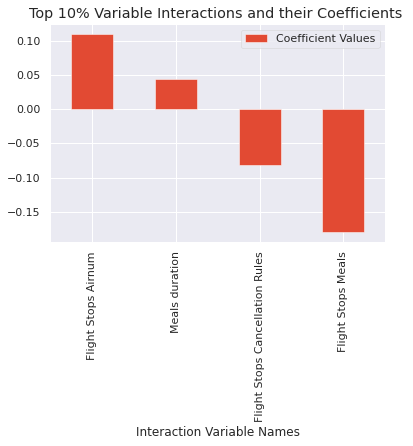

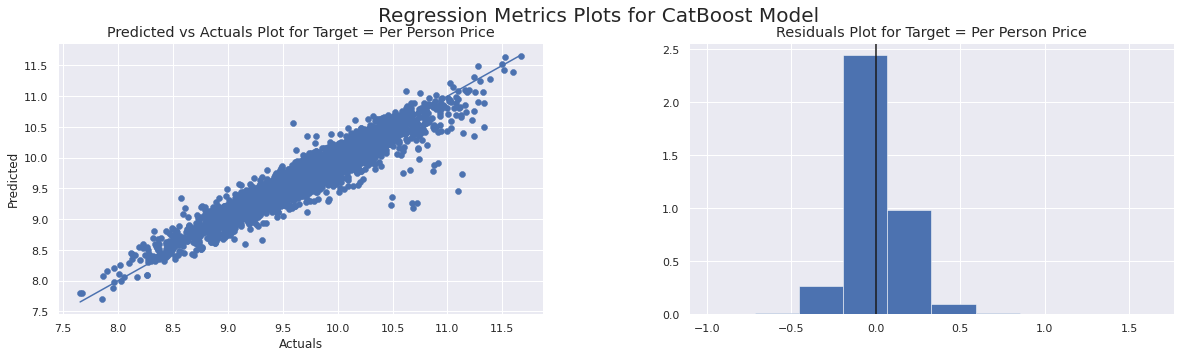

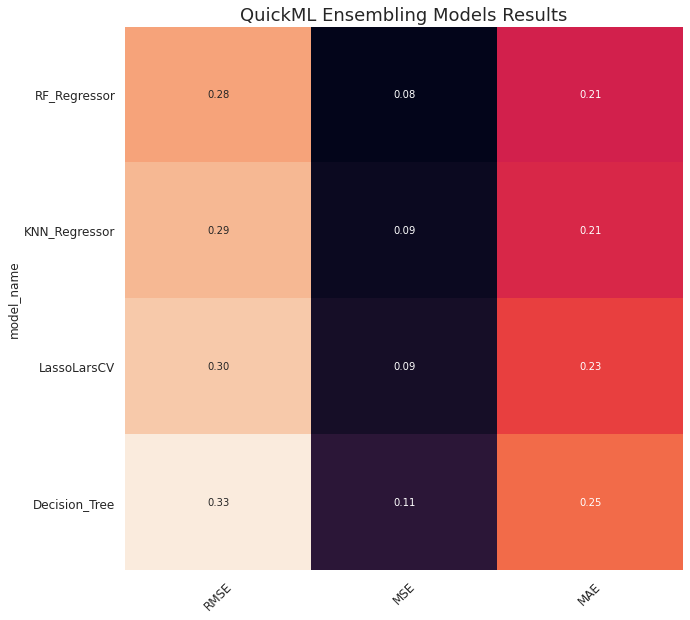

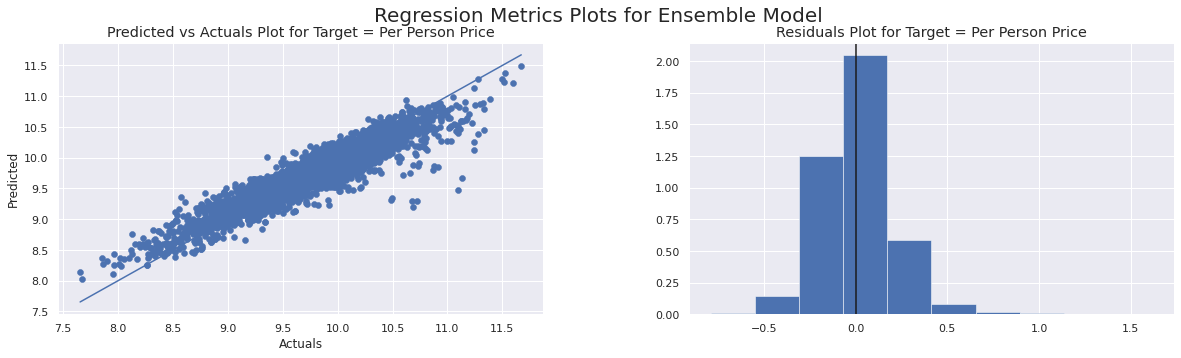

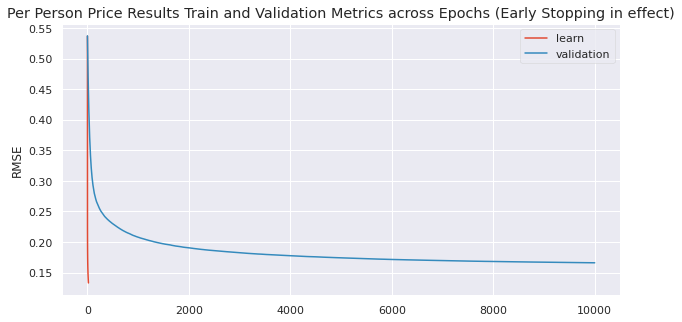

    Time taken for this Target (in seconds) = 413
    Binning_Flag set to False or there are no float vars in data set to be binned
Adding one feature named Per Person Price_KMeans_Clusters using KMeans_Featurizer...
    Used KMeans to naturally cluster Train predictor variables into 4 clusters
    Setting best params for CatBoost model from Initial State since you cannot change params to a fitted Catboost model 
    Number of Categorical and Integer variables used in CatBoost training = 2586
No MinMax scaling performed since scaling flag is set to false
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
0:	learn: 0.5368572	total: 13.3ms	remaining: 2m 12s
500:	learn: 0.2235745	total: 4.98s	remaining: 1m 34s
1000:	learn: 0.1984172	total: 9.82s	remaining: 1m 28s
1500:	learn: 0.1856353	total: 14.7s	remaining: 1m 23s
2000:	learn: 0.1772250	total: 19.7s	remaining: 1m 18s
2500:	learn: 0.1706945	total: 24.5s	remaining: 1m 13s
3000:	learn: 0.1654079	total:

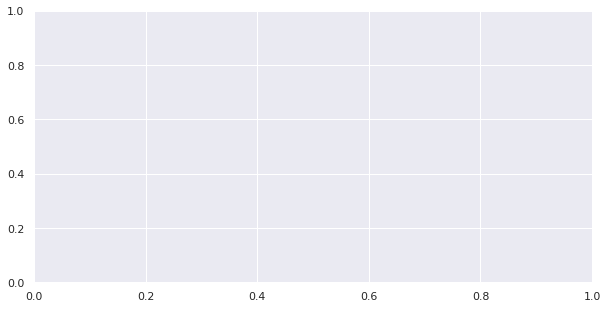

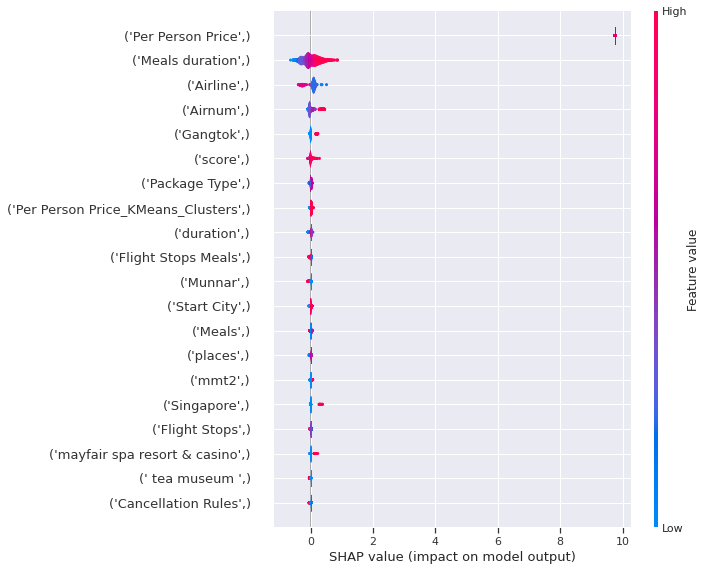

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 961
Writing Output files to disk...
    Saving predictions to ./Per Person Price/Per Person Price_Regression_test_modified.csv
    Saving predictions to ./Per Person Price/Per Person Price_Regression_submission.csv
    Saving predictions to ./Per Person Price/Per Person Price_Regression_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 16.3 for the Entire Process


In [15]:
target  = 'Per Person Price'
model, features, trainm, testm = Auto_ViML(
    train,
    target,
    test,
    sub,
    hyper_param="RS",
    feature_reduction=False,
    scoring_parameter= "neg_mean_squared_log_error",#
    KMeans_Featurizer=True,#False,
    Boosting_Flag= 'catboost',#True,#
    Binning_Flag=False,
    Add_Poly=1,
    Stacking_Flag=False,
    Imbalanced_Flag=False,
    verbose=2
)

In [16]:
sub['Per Person Price'] = np.expm1(sub['Per Person Price'])

In [17]:
sub.to_csv('baseline_v20kc.csv', index=False)# catboost RMSLE = 0.1659

# Model 2 : MLJAR AutoML

In [18]:
!pip install -q -U git+https://github.com/mljar/mljar-supervised.git@master

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.7.0.post2 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.16 which is incompatible.
distributed 2021.2.0 requires cloudpickle>=1.5.0, but you have cloudpickle 1.3.0 which is incompatible.
autogluon-core 0.1.0b20210219 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.16 which is incompatible.
autogluon-core 0.1.0b20210219 requires scipy==1.5.4, but you have scipy 1.6.1 which is incompatible.


In [19]:
from supervised.automl import AutoML # mljar-supervised

In [20]:
col = list(trainm.columns)
col.remove('Per Person Price')

In [21]:
x_cols = col
y_col = 'Per Person Price'

In [22]:
automl = AutoML(
    mode="Compete", 
    eval_metric="rmse",
    total_time_limit=10000,
    features_selection=False # switch off feature selection
)
automl.fit(trainm[x_cols], trainm[y_col])

Linear algorithm was disabled.
AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble availabe models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree rmse 0.373942 trained in 4.76 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 10-fold CV Shuffle
* Step simple_algorithms will try to check up to 3 models
1_DecisionTree rmse 0.375362 trained in 43.98 seconds
2_DecisionTree rmse 0.345573 trained in 44.02 seconds
3_DecisionTree rmse 0.345573 trained in 44.27 seconds
* Step default_algorithms will try to check up to 6 

AutoML(eval_metric='rmse', features_selection=False, mode='Compete',
       total_time_limit=10000)

In [23]:
preds = automl.predict(testm[x_cols])

In [24]:
sub['Per Person Price'] = np.expm1(preds)

In [25]:
sub.to_csv('baseline_v20kd.csv', index=False)# rmse 0.154811 lb:0.15502

In [26]:
sub.describe()

,Per Person Price
count,"9,000.00"
mean,"19,592.68"
std,"10,235.82"
min,"2,106.70"
25%,"12,628.66"
50%,"17,695.80"
75%,"24,595.33"
max,"123,854.96"


In [27]:
automl.report()